### 🏠 Housing Price Inflation Hypothesis Test Two-Tailed Z-Test

In this analysis, I aimed to statistically verify whether **housing price inflation differs significantly from 10%**,  
meaning it could be **either higher or lower** than the claimed rate.

To test this hypothesis, I collected a **random sample of 100 housing price inflation percentages** and performed a **two-tailed Z-test**.

#### **Hypotheses**
- **Null Hypothesis (H₀):** μ = 10%  Housing inflation  avg is 10%  
- **Alternate Hypothesis (H₁):** μ is not equal to 10%  Housing inflation is not equal to 10%


Since the **population standard deviation (σ)** is known, a **Z-test** was the appropriate method.  
The **significance level (α = 0.05)** was split equally between both tails (2.5% on each side).  
The result was validated using both the **rejection region** and **p-value** methods.


In [1]:
import pandas as pd
import numpy as np

In [2]:

from google.colab import files
uploaded = files.upload()

Saving house_price_increase.csv to house_price_increase.csv


In [4]:
df=pd.read_csv('house_price_increase.csv')

### Null Hypothesis: Housing inflation is 10%
### Alternate Hypothesis: Housing inflation is NOT 10%

###That means it can  be above or below


For this test,I  have again  collected a sample of 100 home prices inflation numbers. This is the same data frame as previous for one test

In [5]:
df = pd.read_csv("house_price_increase.csv")
df.head()

,house_id,price_increase_pct
0,NJ001,12.7
1,NJ002,11.3
2,NJ003,11.9
3,NJ004,13.2
4,NJ005,12.8


In [6]:
df.shape

(100, 2)

In [9]:
df.shape  # 100 rows or sample

(100, 2)

In [8]:
population_mean = 10  # hard coding poulation mean  which is status quo
population_std_dev = 4 # Hard coding population std dev

In [7]:
# sample mean from my 100 samples turns out to be 11 which is greater than 10

sample_mean = df.price_increase_pct.mean()
sample_mean

np.float64(11.0)

In [10]:
sample_size = df.shape[0]
sample_size

100

In [11]:
standard_error = population_std_dev/np.sqrt(sample_size)  # calculation standard error or standard deviation
#of sampling distribution of sample mean and my n  is already >30 so it lies with the standard normal curve
standard_error

np.float64(0.4)

In [12]:
z_score = (sample_mean-population_mean)/standard_error
z_score

np.float64(2.5)

#I am defining  significance level (alpha) to be 5%.  # 1- confidence level

# so my confidence level is 95

#But this time this is divided in 2.5/2.5 in both  left and right side of tail as its a two test

In [13]:
alpha = 0.05 # alpha is  significance level

In [15]:
from scipy import stats

z_critical=stats.norm.ppf(1-alpha/2)  #95 percent z critical

z_critical

np.float64(1.959963984540054)

In [16]:
abs(z_score), z_critical

(np.float64(2.5), np.float64(1.959963984540054))

Since z_score > z_critical, we will reject the NULL hypothesis.

This means the alternate hypothesis becomes true which means the inflation is indeed higher than 10%

The z score can be positve or negative as its two tail so using abs

### Z Test Using p-Value

In [17]:
from scipy import stats

stats.norm.cdf(z_score)

np.float64(0.9937903346742238)

In [21]:
p_value = 2*(1 - stats.norm.cdf(abs(z_score))) # getting p value from z score

# I have multiplied it by 2 as we are taking the probability of 2.5 both form left and right
p_value

np.float64(0.012419330651552318)

Since P value (0.0124) is less than alpha (i.e. significance level -> 0.05), we reject the null hypothesis. This means there is statistically significant evidence to support the claim that the inflation rate in house prices is higher than the reported 10%.

In [27]:
if abs(z_score) > z_critical:
    print(" Reject Null Hypothesis → Susnata is correct, Housing inflation is statistically different from 10%.") # can be over 10 or lower
else:
    print(" Fail to Reject Null Hypothesis → No significant evidence that inflation differs from 10%.")


 Reject Null Hypothesis → Susnata is correct, Housing inflation is statistically different from 10%.


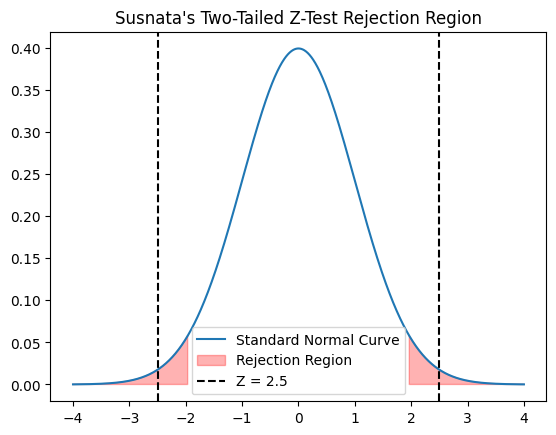

In [29]:
#Plotting two see the curve
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

plt.plot(x, y, label='Standard Normal Curve')
plt.fill_between(x, y, where=(x < -z_critical) | (x > z_critical), color='red', alpha=0.3, label='Rejection Region')
plt.axvline(z_score, color='black', linestyle='--', label=f'Z = {z_score}')
plt.axvline(-z_score, color='black', linestyle='--')
plt.title("Susnata's Two-Tailed Z-Test Rejection Region")
plt.legend()
plt.show()